Завдання 1.
Завантажити датасет Ірис. Роздрукувати перші 5 рядочків.
Методом ліктя і методом силуєтів визначити оптимальну кількість кластерів.
Візуалізувати кластери.



In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

In [5]:
iris = load_iris()
x = iris.data

pd.DataFrame(x, columns=iris.feature_names).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


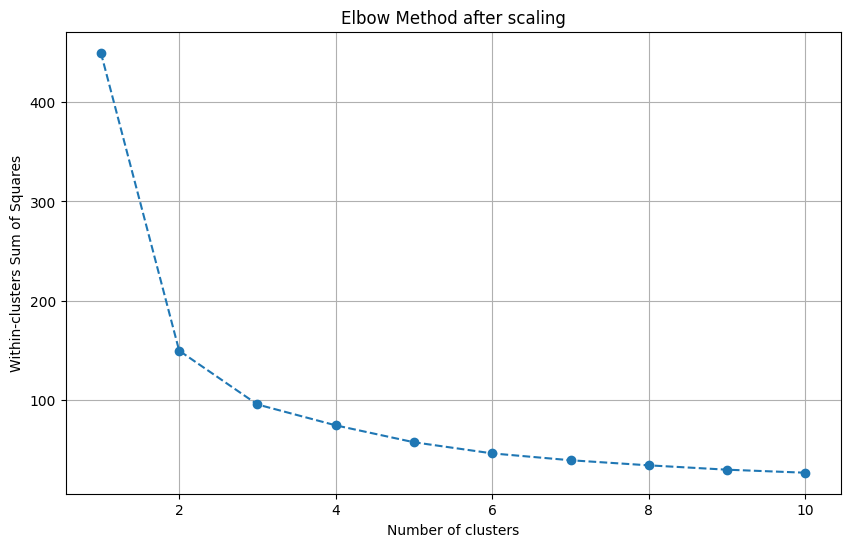

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)
X_2d = pd.DataFrame(X_scaled, columns=iris.feature_names).iloc[:,1:]

wcss_2d = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
  kmeans.fit(X_2d)
  wcss_2d.append(kmeans.inertia_)

plt.figure(figsize = (10, 6))
plt.plot(range(1,11), wcss_2d, marker='o', linestyle='--')
plt.title('Elbow Method after scaling')
plt.xlabel('Number of clusters')
plt.ylabel('Within-clusters Sum of Squares')
plt.grid(True)
plt.show()

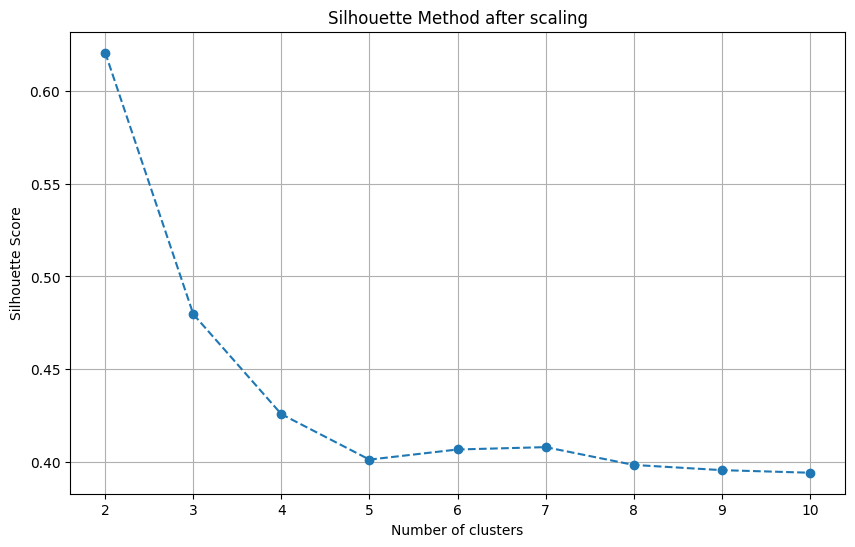

In [8]:
silhouette_scores = []
for i in range(2,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
  cluster_labels = kmeans.fit_predict(X_2d)
  silhouette_avg = silhouette_score(X_2d, cluster_labels)
  silhouette_scores.append(silhouette_avg)

plt.figure(figsize = (10, 6))
plt.plot(range(2,11), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Method after scaling')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

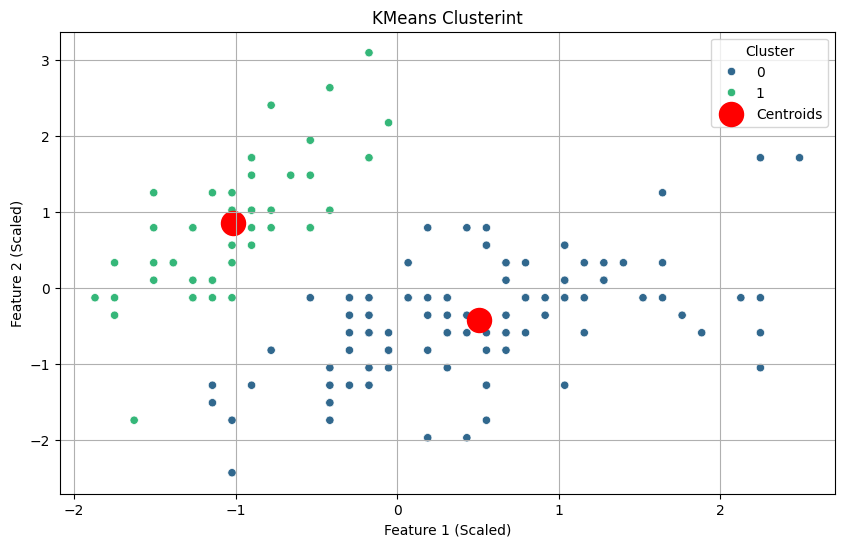

In [10]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(10,6))
sns.scatterplot(x=X_scaled[:,0], y=X_scaled[:,1], hue=clusters, palette='viridis', legend='full')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c='red', label='Centroids')
plt.title('KMeans Clusterint')
plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

Висновок
Завантажили датасет Ірис. Роздрукували перші 5 рядків. Методом ліктя і методом силуєтів визначили оптимальну кількість кластерів(2). Візуалізували кластери.